# Lecture 24 - Data Analysis via Least-Squares Fitting 

## Overview, Objectives, and Key Terms
 
A ubiquitous task in engineering and other technical disciplines is the analysis of data.  Data comes from many sources, including measurements in the laboratory and numerical simulations.  In this lecture and in [Lecture 25](ME400_Lecture_25.ipynb), we'll apply what we've learned so far to produce *models* from data that we can use to explore trends and make conclusions.  Specifically, in this lecture, we'll develop models based on **least-squares** fitting of model parameters to existing data.  Such fitting may be the right choice when the data in contaminated by noise or when the model need only capture the main features of the observed phenomenon.

## Exam 2 - Second Chance 

  - 20 minutes
  - Notes are okay
  - No computer/calculator 
  - Use your paper, remove frills, and put name and lab time on *top right*
  - Worth 3 points (15%) on the exam

### Problem 1 - 1 point

Suppose you were given a function named `foo` that sorts lists of numbers.  Not knowing its order, you tested it for several 100-element lists and found it took, on average 10 s per sort.  You did the same for several 1000-element lists, and found it took 1000 s per sort (on average).  Is the method $\mathcal{O}(\log n)$, $\mathcal{O}(n)$, $\mathcal{O}(n \log n)$, $\mathcal{O}(n^2)$, or something else?  *Show your work* and circle you answer.

### Problem 2 - 1 point

Consider a rocket in space moving in a straight path.  Its position with time is $x(t) = t^3 + 12t$, where $x$ is in km and $t$ is in s.  What is the rocket's acceleration at $t = 10$ s?  Circle your answer (including units).

### Problem 3 - 1 point

Consider a rocket in space moving in a straight path.  Its position was measured at $t = 8, 9, 10$ (in s) and found to be $x = 350, 450, 600$ (in km), respectively. What is the rocket's acceleration at $t = 10$ s?  Circle your answer (including units).

### Objectives

By the end of this lesson, you should be able to

- Explain (and demonstrate) what is meant by a least-squares fit of a linear model $ax+b$ to a set of measured points $(x_i, y_i),\, i = 0, 1, \ldots$.
- Use built-in tools to perform linear, least-squares fitting of data to models
- Use built-in tools to perform nonlinear, least-squares fitting of data to models

### Key Terms

- error
- least-squares
- normal equation
- `np.linalg.solve`
- `np.polyfit`
- `np.polyval`
- `scipy.optimize.curve_fit`

## Noisy Data

A familiar task: draw a line of "best fit" through noisy data $(x_i, y_i)$

Alternative description: find $a$ and $b$ so that the *linear model* $y(x) = ax + b$ best matches the data.

In [1]:
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
t = np.sort(np.random.rand(50)*10)
y = 0.25*t**2 + 3*t + 2 + np.random.normal(size=50)*t/2
b = 0
# connect first and last points
a = (y[-1]-y[0])/(t[-1]-t[0])
b = y[0] - a * t[0]
y_a1 = a*t + b
# connect minimum and maximum points
t_max = t[np.where(y==max(y))]
t_min = t[np.where(y==min(y))]
a = (max(y)-min(y))/(t_max-t_min)
b = min(y) - a * t_min
y_a2 = a*t + b

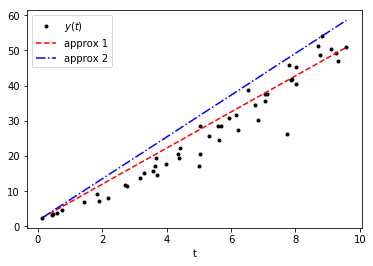

In [2]:
plt.plot(t, y, 'k.', t, y_a1, 'r--', t, y_a2, 'b-.')
plt.legend(["$y(t)$", "approx 1", "approx 2"])
plt.xlabel('t')
plt.show()

## What "Best" Means

The error is the difference between the model and data:

$$
  e_i = y(t_i) - y_i = a t_i + b - y_i \, \quad i = 0, 1, \ldots
$$

A model is the **least-squares, best fit** if it minimizes 

$$
  || \mathbf{e} ||_2 = \sqrt{ |e_0|^2 + |e_1|^2 + \ldots} = \sqrt{\sum_{i=0} |e_i|^2} \,  ,
$$

the $L_2$ norm (or euclidean norm) of the error.  Similar to other error metrics we've seen?

**Exercise**: Compute and plot errors from example, and compute their L2-norms.

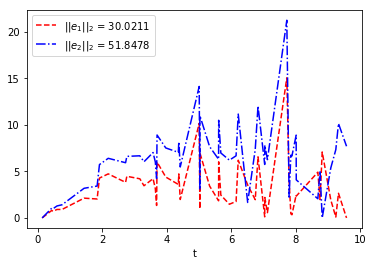

In [3]:
e_1, e_2 = abs(y-y_a1), abs(y-y_a2)
norm_e_1, norm_e_2 = np.linalg.norm(e_1), np.linalg.norm(e_2)
plt.plot(t, e_1, 'r--', t, e_2, 'b-.')
plt.legend([r"$||e_1||_2$ = {:.4f}".format(norm_e_1), 
            r"$||e_2||_2$ = {:.4f}".format(norm_e_2)])
plt.xlabel('t')
plt.show()

Linear least-square solutions are found by solving the normal equations:

$$
\mathbf{c} = (\mathbf{M}^T \mathbf{M})^{-1}  \mathbf{M}^T \mathbf{y} \, .
$$

where the model attempts to satisfy $\mathbf{Mc} = \mathbf{y}$.  

Here, $\mathbf{M} = [\mathbf{x}, \mathbf{1}]$ and $\mathbf{c} = [a, b]^T$.

## Beyond Linear Models

Not all data is intrinsically linear.  Alternatives:

 - polynomial models $y(x) = a_n x^n + a_{n-1} x^{n-1} +  \ldots + a_0$.
 - problem-specific models, e.g., $y(x) = a_0 e^x + a_1 e^{-x} + a_2$.
 
The key is that the coefficients $a_n$ are weights of separate, nonparameterized functions of $x$.  *Linear* least-squares fitting can be used (just like for $y(x) = ax+b$).

For polynomial fits, use `np.polyfit` and `np.polyval`:

In [4]:
# fit sin(x)**2 to linear, quadratic, and cubic
x = np.linspace(0, 2, 100)
y = np.sin(x)**2
#                   # a_n, a_{n-1}, ...  #
y_lin  = np.polyval(np.polyfit(x, y, deg=1), x)
y_quad = np.polyval(np.polyfit(x, y, deg=2), x)
y_cub  = np.polyval(np.polyfit(x, y, deg=3), x)

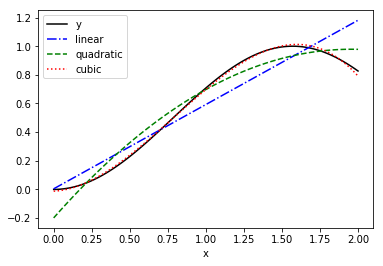

In [5]:
plt.plot(x, y, 'k', x, y_lin, 'b-.', 
         x, y_quad, 'g--', x, y_cub, 'r:')
plt.legend(['y', 'linear', 'quadratic', 'cubic'])
plt.xlabel('x')
plt.show()

## Beyond Polynomial Models

Linear models are common, and polynomial models can provide necessary improvements.  For many cases, neither type of model is sufficient.  

Consider data that needs to be fitted to 

$$
    y(t) = a\sin(bt + c) + d
$$

Because $b$ and $c$ are *inside* a nonlinear function, *linear* least-squares fitting is not applicable.  Rather, we need *nonlinear* least squares via, e.g., `scipy.optimize.curve_fit`.

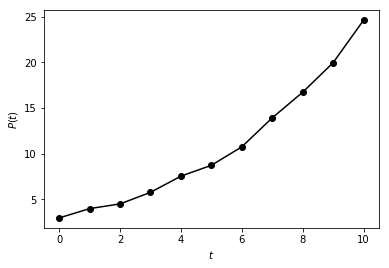

In [6]:
t = np.linspace(0, 10, 11)
P = np.array([2.945, 3.964, 4.481, 5.747, 7.523, 8.710, 10.733, 13.910, 16.721, 19.951, 24.610])
plt.plot(t, P, 'k-o')
plt.xlabel('$t$'); plt.ylabel('$P(t)$')
plt.show()

In [7]:
def model(t, a, b):
    return a*np.exp(b*t) 

In [8]:
from scipy.optimize import curve_fit
c = curve_fit(model, t, P)[0]
c

array([ 3.18684102,  0.2049746 ])

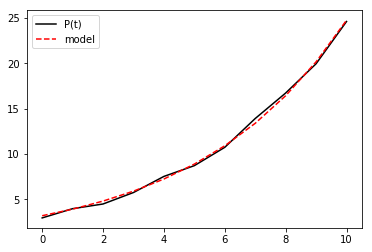

In [9]:
P_model = model(t, *c)
plt.plot(t, P, 'k', t, P_model, 'r--')
plt.legend(['P(t)', 'model'])
plt.show()

## Recap

You should now be able to:

- Explain (and demonstrate) what is meant by a least-squares fit of a linear model $ax+b$ to a set of measured points $(x_i, y_i),\, i = 0, 1, \ldots$.
- Use built-in tools to perform linear, least-squares fitting of data to models
- Use built-in tools to perform nonlinear, least-squares fitting of data to models